# Análise preliminar dos dados brutos do ER

In [1]:
import pandas as pd 
er = pd.read_csv('ER.csv')

### Quais colunas nós temos?

In [2]:
er.columns

Index(['COUNTRY', 'INDICATOR', 'TYPE_OF_TRANSFORMATION', 'FREQUENCY',
       'TIME_PERIOD', 'value', 'index'],
      dtype='object')

### Quais são os tipode de dados de cada coluna?

In [3]:
display(er.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26418 entries, 0 to 26417
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COUNTRY                 26418 non-null  object 
 1   INDICATOR               26418 non-null  object 
 2   TYPE_OF_TRANSFORMATION  26418 non-null  object 
 3   FREQUENCY               26418 non-null  object 
 4   TIME_PERIOD             26418 non-null  object 
 5   value                   26418 non-null  float64
 6   index                   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


None

Objetos do tipo object indicam que eles podem ser de qualquer tipo, isso não é bom. É necessário ser tratado da bronze para a silver!

### Qual o shape da nossa tabela (linhas x colunas)?

In [4]:
er.shape

(26418, 7)

*Resumo Inicial*:

É uma tabela que possui 26418 linhas e 7 colunas, sendo elas:
1. 'COUNTRY'
2. 'INDICATOR'
3. 'TYPE_OF_TRANSFORMATION'
4. 'FREQUENCY'
5. 'TIME_PERIOD'
6. 'value',
7. 'index'

- Além disso, podemos ver que a coluna 'index' todos os itens são nulos e sobre os tipos de dados,

    - Todas as colunas são do tipo object exceto 'value' e 'index' que são do tipo float


### Percentual de valores nulos por país

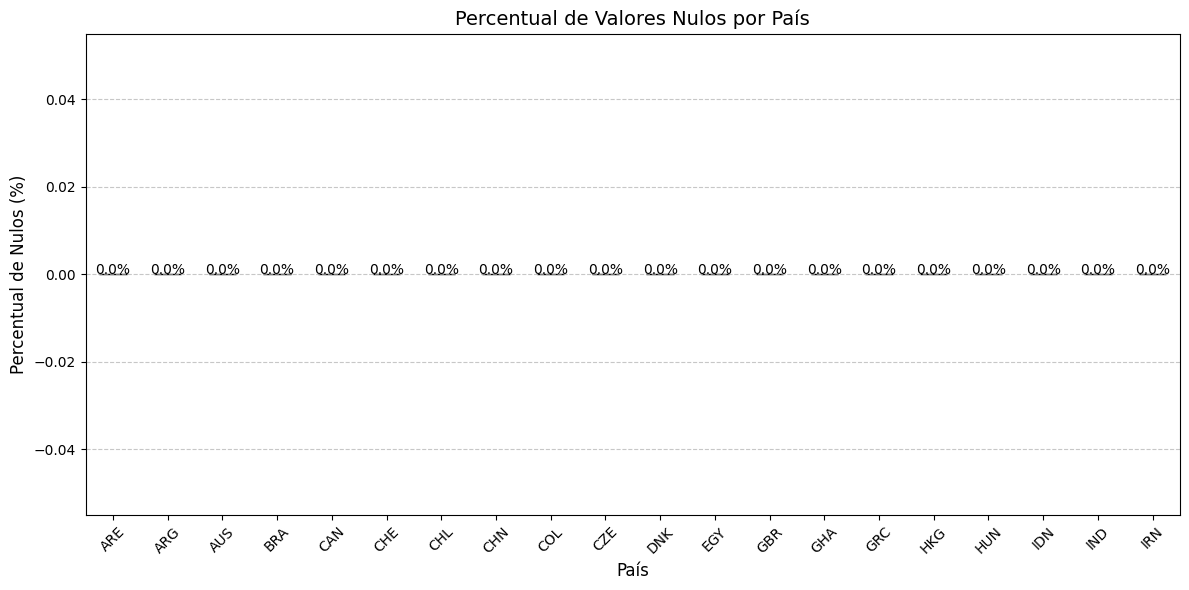

In [7]:
import matplotlib.pyplot as plt

nulos = er.replace(0, None) # Trocando os valores zero por nulo

percentual_nulos = (
    nulos.groupby('COUNTRY')['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .sort_values(ascending=False)
    .head(20)
)


# Adicionando os valores no topo de cada barra
for index, value in enumerate(percentual_nulos):
    plt.text(index, value , f'{value:.1f}%', ha='center', fontsize=10)


percentual_nulos.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Percentual de Valores Nulos por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Percentual de Nulos (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Análise descritiva dos dados

- O método describe originalmente faz a análise apenas das colunas numéricas:

In [6]:
er.describe()

,value,index
count,26418.000000,0.0
mean,1587.869537,NaN
std,6085.608457,NaN
min,0.260870,NaN
25%,3.750000,NaN
50%,9.407251,NaN
75%,76.205175,NaN
max,60491.275574,NaN


- Aqui teremos uma análise descritiva das colunas que não são numéricas

In [7]:
er.describe(exclude='number')

,COUNTRY,INDICATOR,TYPE_OF_TRANSFORMATION,FREQUENCY,TIME_PERIOD
count,26418,26418,26418,26418,26418
unique,44,3,2,1,103
top,USA,XDC_USD,EOP_RT,Q,2000-Q1
freq,616,8824,13209,26418,264


### Análise do describe

Aqui podemos decobrir algumas informações importantes:

- Estamos com dados de 44 países
- Tem 3 indicadores diferentes sendo analisados ao todo
- Estamos com 2 tipos de transformações (coluna TYPE_OF_TRANSFROMATION)



# O que mais podemos descobrir?

1. Quais são esses países?
2. Quais são esses 3 indicadores?
3. Todos os países tem os 3 indicadores com valores não nulos?
4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?
5. Como fica o gráfico da comparação dos países com cada indicador?

#### 1. Quais são os países?

In [8]:
er.COUNTRY.unique()

array(['USA', 'CHN', 'JPN', 'GBR', 'IND', 'CAN', 'AUS', 'KOR', 'CHE',
       'SWE', 'DNK', 'POL', 'CZE', 'HUN', 'ROU', 'GRC', 'BRA', 'MEX',
       'ARG', 'COL', 'CHL', 'PER', 'URY', 'TWN', 'SGP', 'HKG', 'THA',
       'MYS', 'VNM', 'IDN', 'PHL', 'SAU', 'ARE', 'QAT', 'KWT', 'IRN',
       'ISR', 'NOR', 'RUS', 'ZAF', 'EGY', 'NGA', 'GHA', 'KEN'],
      dtype=object)

#### 2. Quais são os indicadores?

In [9]:
er.INDICATOR.unique()

array(['XDC_USD', 'XDC_EUR', 'XDC_XDR'], dtype=object)

| Indicador    | Nome (EN)                       | Nome (PT)                       | Interpretação / Uso                                                                   |
| ------------ | ------------------------------- | ------------------------------- | ------------------------------------------------------------------------------------- |
| **XDC\_USD** | Domestic currency per US Dollar | Moeda doméstica por 1 Dólar     | **Âncora global** em finanças; facilita comparações e conversões. Ex.: BRL por 1 USD. |
| **XDC\_EUR** | Domestic currency per Euro      | Moeda doméstica por 1 Euro      | Útil em análises com Europa; **segunda âncora** relevante. Ex.: COP por 1 EUR.        |
| **XDC\_XDR** | Domestic currency per SDR (IMF) | Moeda doméstica por 1 SDR (DEG) | Alinha com bases **IRFCL/IIP** quando os dados estiverem em **SDR**.                  |


#### 3. Todos os países tem os 3 indicadores com valores não nulos?

Queremos identificar quais indicadores de cada país que tem valores nulos


In [10]:
import numpy as np 

er_null = er.replace(0, np.nan) # Trocando os valores zero por nulo

pivot_nulos = er_null.pivot_table(
    values='value',
    index='COUNTRY',
    columns='INDICATOR',
    aggfunc=lambda x: x.isnull().sum()
)

display(pivot_nulos)


INDICATOR,XDC_EUR,XDC_USD,XDC_XDR
COUNTRY,,,
ARE,0,0,0
ARG,0,0,0
AUS,0,0,0
BRA,0,0,0
CAN,0,0,0
CHE,0,0,0
CHL,0,0,0
CHN,0,0,0
COL,0,0,0


#### 4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?



In [11]:
print(er_null['TIME_PERIOD'].min())
print(er_null['TIME_PERIOD'].max())

2000-Q1
2025-Q3


Estamos trabalhando com dados do período do primeiro trismestre de 2000 até o segundo trimestre de 2025!

#### 5. Como fica o gráfico da comparação dos países com cada indicador?

### Maiores economias:

- **Países:** `USA, CHN, DEU, JPN, GBR, FRA, ITA, IND, CAN, AUS`

In [12]:
import matplotlib.pyplot as plt


indicadores = er_null.INDICATOR.unique()

paises = ['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'BRA', 'AUS']


In [13]:
 er_null.INDICATOR.unique()

array(['XDC_USD', 'XDC_EUR', 'XDC_XDR'], dtype=object)

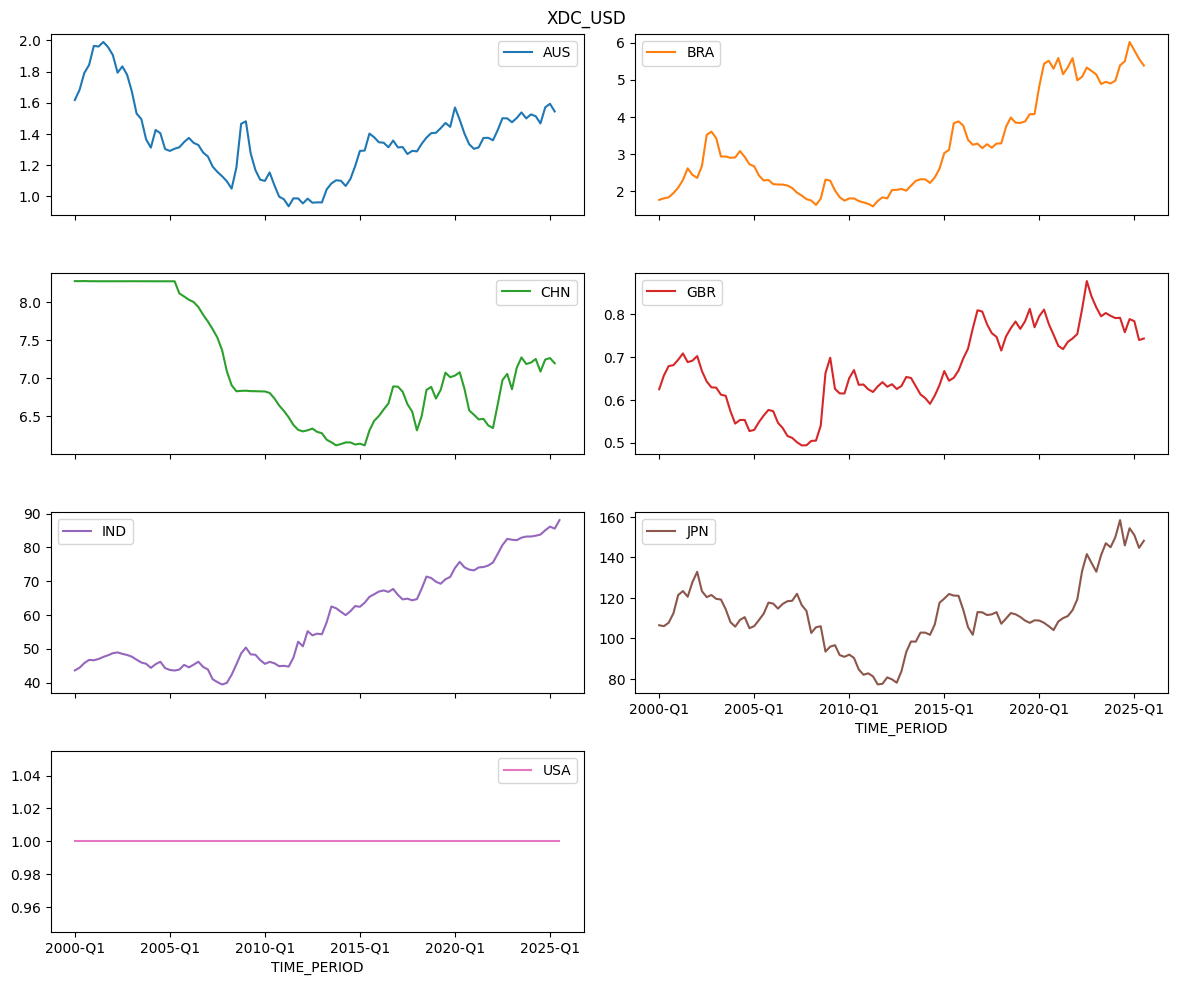

In [14]:
df_filtrado = er_null[(er_null['INDICATOR']== 'XDC_USD') & (er_null['COUNTRY'].isin(paises))]

# display(teste['TIME_PERIOD'])
pivot_filtrado = df_filtrado.pivot_table(
    values='value',
    index='TIME_PERIOD',
    columns='COUNTRY',
)

pivot_filtrado.plot(figsize=(12,12), title='XDC_USD', subplots=True, layout=(5,2))
plt.tight_layout()  # melhor espaçamento entre subplots
plt.show()  



<Axes: title={'center': 'Volatilidade Cambial por País (Desvio Padrão)'}, xlabel='COUNTRY'>

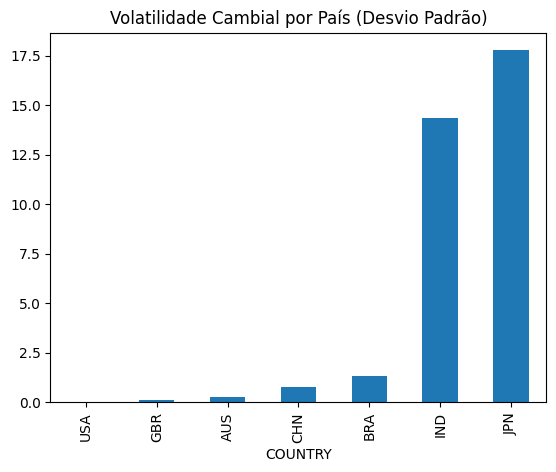

In [15]:
df_std = pivot_filtrado.std()
df_std.sort_values().plot(kind='bar', title='Volatilidade Cambial por País (Desvio Padrão)')


<Axes: title={'center': 'Índice de Variação Cambial (Base 100)'}, xlabel='TIME_PERIOD'>

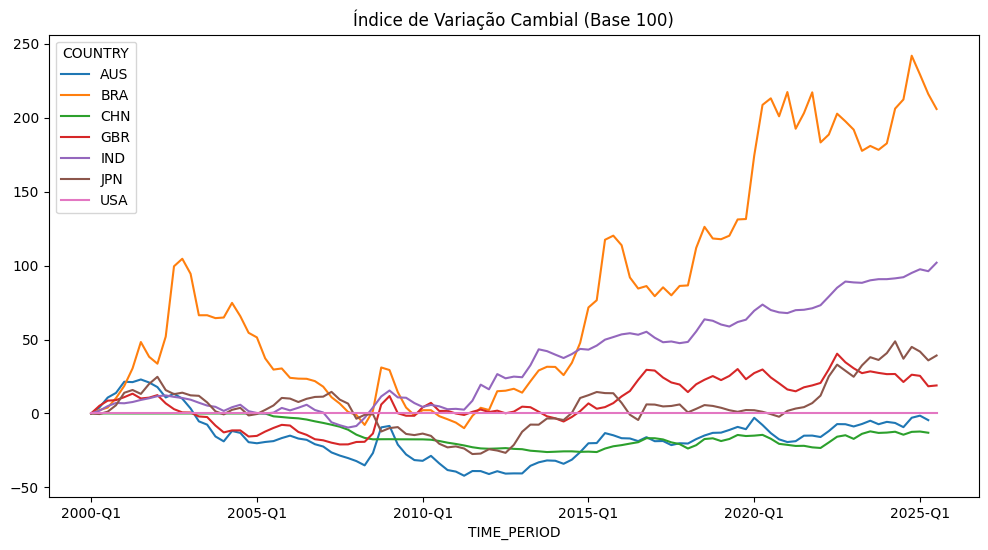

In [16]:
pivot_indexado = (pivot_filtrado / pivot_filtrado.iloc[0] * 100) - 100
pivot_indexado.plot(figsize=(12, 6), title='Índice de Variação Cambial (Base 100)')


In [17]:
er_null

,COUNTRY,INDICATOR,TYPE_OF_TRANSFORMATION,FREQUENCY,TIME_PERIOD,value,index
0,USA,XDC_USD,EOP_RT,Q,2000-Q1,1.000000,NaN
1,USA,XDC_USD,EOP_RT,Q,2000-Q2,1.000000,NaN
2,USA,XDC_USD,EOP_RT,Q,2000-Q3,1.000000,NaN
3,USA,XDC_USD,EOP_RT,Q,2000-Q4,1.000000,NaN
4,USA,XDC_USD,EOP_RT,Q,2001-Q1,1.000000,NaN
...,...,...,...,...,...,...,...
26413,KEN,XDC_XDR,PA_RT,Q,2024-Q2,172.812477,NaN
26414,KEN,XDC_XDR,PA_RT,Q,2024-Q3,173.216976,NaN
26415,KEN,XDC_XDR,PA_RT,Q,2024-Q4,170.985126,NaN
26416,KEN,XDC_XDR,PA_RT,Q,2025-Q1,169.770575,NaN


In [18]:
er_null.TYPE_OF_TRANSFORMATION.unique()

array(['EOP_RT', 'PA_RT'], dtype=object)

In [21]:
# Lista indicadores

indicadores_nome = dict(
    XDC_USD = 'conversao_dolar',
    XDC_EUR = 'conversao_euro',
    XDC_XDR = 'conversao_SDR'
)

In [23]:
lista_dfs = []
merge_final = pd.DataFrame()
er_null= er_null[er_null.TYPE_OF_TRANSFORMATION == 'EOP_RT']

for pais in er_null.COUNTRY.unique():
    df_filtrado = er_null[er_null['COUNTRY'] == pais]
    df_filtrado = df_filtrado.drop(columns='index')
    grupos = df_filtrado.groupby(['COUNTRY','INDICATOR'])

    for i,valor in enumerate(grupos):
        chave, df = valor
        nome = indicadores_nome.get(chave[1])
        df = df.rename(columns={'value': (f'value_{nome}'),'INDICATOR':(f"INDICATOR_{nome}")})
        
        if i == 0:
            merge_final = df.copy()
        else:
            merge_final = pd.merge(merge_final, df, on=['COUNTRY', 'TYPE_OF_TRANSFORMATION','TIME_PERIOD','FREQUENCY'], how='outer')

    lista_dfs.append(merge_final)

df_final = pd.concat(lista_dfs, ignore_index=True)

  

In [24]:
df_final

,COUNTRY,INDICATOR_conversao_euro,TYPE_OF_TRANSFORMATION,FREQUENCY,TIME_PERIOD,value_conversao_euro,INDICATOR_conversao_dolar,value_conversao_dolar,INDICATOR_conversao_SDR,value_conversao_SDR
0,USA,XDC_EUR,EOP_RT,Q,2000-Q1,0.955300,XDC_USD,1.0000,XDC_XDR,1.346874
1,USA,XDC_EUR,EOP_RT,Q,2000-Q2,0.955600,XDC_USD,1.0000,XDC_XDR,1.337279
2,USA,XDC_EUR,EOP_RT,Q,2000-Q3,0.876500,XDC_USD,1.0000,XDC_XDR,1.297891
3,USA,XDC_EUR,EOP_RT,Q,2000-Q4,0.930500,XDC_USD,1.0000,XDC_XDR,1.302908
4,USA,XDC_EUR,EOP_RT,Q,2001-Q1,0.883200,XDC_USD,1.0000,XDC_XDR,1.260651
...,...,...,...,...,...,...,...,...,...,...
4407,KEN,XDC_EUR,EOP_RT,Q,2024-Q2,138.658654,XDC_USD,129.5270,XDC_XDR,170.372650
4408,KEN,XDC_EUR,EOP_RT,Q,2024-Q3,144.647506,XDC_USD,129.1957,XDC_XDR,175.237399
4409,KEN,XDC_EUR,EOP_RT,Q,2024-Q4,134.322186,XDC_USD,129.2927,XDC_XDR,168.615087
4410,KEN,XDC_EUR,EOP_RT,Q,2025-Q1,139.855795,XDC_USD,129.3165,XDC_XDR,171.822226
